In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.interpolate import interp1d
from scipy.stats import percentileofscore
from sw_utilities import tukeyTest

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# make a folder to store figures if not already there
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# read in control mesenchyme tracking data

# SMG1
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/control-mesenchyme-Imaris-tracking-stats/180218-all-combined-denoised-bc-all-t1-150_Statistics/180218-all-combined-denoised-bc-all-t1-150_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['control']*len(df)
df['group_id'] = ['control_SMG1']*len(df)

df1 = df

# SMG2
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/control-mesenchyme-Imaris-tracking-stats/190227-mtmghisg-2photon-e13-combined-bc-all-with-tracking-and-selection_Statistics/190227-mtmghisg-2photon-e13-combined-bc-all-with-tracking-and-selection_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['control']*len(df)
df['group_id'] = ['control_SMG2']*len(df)

df2 = df

# SMG3
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/control-mesenchyme-Imaris-tracking-stats/4_K14Rhet-HisG-1-1-denoised_Statistics/4_K14Rhet-HisG-1-1-denoised_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['control']*len(df)
df['group_id'] = ['control_SMG3']*len(df)

df3 = df


df_control = pd.concat([df1, df2, df3])
df_control.head()


,Track_Speed_Mean,Unit,Category,ID,Unnamed: 4,experiment_group,group_id
0,10.6759,um/h,Track,1000000000,NaN,control,control_SMG1
1,10.2957,um/h,Track,1000000016,NaN,control,control_SMG1
2,13.4984,um/h,Track,1000000017,NaN,control,control_SMG1
3,12.2534,um/h,Track,1000000018,NaN,control,control_SMG1
4,14.3365,um/h,Track,1000000024,NaN,control,control_SMG1


In [3]:
# read in collagenase mesenchyme tracking data

# SMG1
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/collagenase-mesenchyme-Imaris-tracking-stats/1_SMG1-1_Statistics/1_SMG1-1_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['collagenase']*len(df)
df['group_id'] = ['collagenase_SMG1']*len(df)

df4 = df

# SMG2
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/collagenase-mesenchyme-Imaris-tracking-stats/3_SMG2-1_Statistics/3_SMG2-1_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['collagenase']*len(df)
df['group_id'] = ['collagenase_SMG2']*len(df)

df5 = df

# SMG3
track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/collagenase-mesenchyme-Imaris-tracking-stats/7_SMG3-1_Statistics/7_SMG3-1_Track_Speed_Mean.csv'
df = pd.read_csv(track_file, skiprows=3)
df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# annotate experimenal group
df['experiment_group'] = ['collagenase']*len(df)
df['group_id'] = ['collagenase_SMG3']*len(df)

df6 = df


df_collagenase = pd.concat([df4, df5, df6])
df_collagenase.head()


,Track_Speed_Mean,Unit,Category,ID,Unnamed: 4,experiment_group,group_id
0,14.33820,um/h,Track,1000000003,NaN,collagenase,collagenase_SMG1
1,15.27630,um/h,Track,1000000004,NaN,collagenase,collagenase_SMG1
2,24.02030,um/h,Track,1000000005,NaN,collagenase,collagenase_SMG1
3,9.28651,um/h,Track,1000000006,NaN,collagenase,collagenase_SMG1
4,15.37580,um/h,Track,1000000008,NaN,collagenase,collagenase_SMG1


In [4]:
# # SMG2 last 2 h -- epithelium relatively stable, but mesenchyme speed still higher
# track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/collagenase-mesenchyme-Imaris-tracking-stats/last-2h-3_SMG2-1_Statistics/3_SMG2-1_Track_Speed_Mean.csv'
# df = pd.read_csv(track_file, skiprows=3)
# df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# # annotate experimenal group
# df['experiment_group'] = ['collagenase']*len(df)
# df['group_id'] = ['collagenase_SMG2_last2h']*len(df)

# df7 = df

# # SMG1 10-14 h -- epithelium relatively stable, but mesenchyme speed still higher
# track_file = '../data/imaris-overall-tracking-data/Mesenchyme-tracks/collagenase-mesenchyme-Imaris-tracking-stats/10-14h/1_SMG1-1_Track_Speed_Mean.csv'
# df = pd.read_csv(track_file, skiprows=3)
# df.rename(columns={'Track Speed Mean':'Track_Speed_Mean'}, inplace=True)

# # annotate experimenal group
# df['experiment_group'] = ['collagenase']*len(df)
# df['group_id'] = ['collagenase_SMG1_10-14h']*len(df)

# df8 = df

In [5]:
df_list = [df1, df2, df3, df4, df5, df6]
groups = ['control']*3 + ['collagenase']*3

# combine all data
df = pd.concat(df_list)

# check n for each gland
print([len(i) for i in df_list])

# mean track speed for each gland
mes_speed_means = [i.Track_Speed_Mean.mean() for i in df_list]
print(mes_speed_means)

[2035, 3138, 705, 1578, 2652, 1909]
[12.588794093366076, 12.303216634799227, 12.62687195744682, 15.635469708491788, 13.769293638763196, 15.156333410162375]


<AxesSubplot:xlabel='group_id', ylabel='Track_Speed_Mean'>

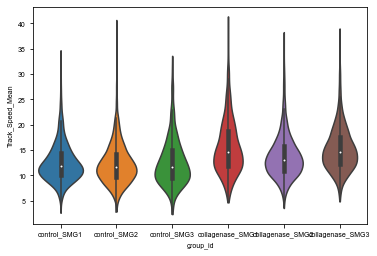

In [6]:
sns.violinplot(data=df, x='group_id', y='Track_Speed_Mean', cut=0)

In [7]:
tukeyTest(df.Track_Speed_Mean, df.group_id)

Summary of test:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
collagenase_SMG1 collagenase_SMG2  -1.8662  0.001 -2.2613 -1.4711   True
collagenase_SMG1 collagenase_SMG3  -0.4791 0.0157 -0.9019 -0.0563   True
collagenase_SMG1     control_SMG1  -3.0467  0.001 -3.4635 -2.6298   True
collagenase_SMG1     control_SMG2  -3.3323  0.001 -3.7158 -2.9487   True
collagenase_SMG1     control_SMG3  -3.0086  0.001 -3.5716 -2.4456   True
collagenase_SMG2 collagenase_SMG3    1.387  0.001   1.014    1.76   True
collagenase_SMG2     control_SMG1  -1.1805  0.001 -1.5467 -0.8143   True
collagenase_SMG2     control_SMG2  -1.4661  0.001 -1.7939 -1.1383   True
collagenase_SMG2     control_SMG3  -1.1424  0.001  -1.669 -0.6158   True
collagenase_SMG3     control_SMG1  -2.5675  0.001 -2.9635 -2.1716   True
collagenase_SMG3     control_SMG2

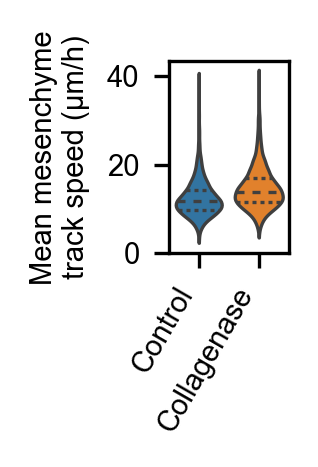

In [13]:
output_prefix = 'SMG-mesenchyme-mean-track-speed-collagenase-violin'
output_file_name = '../jupyter_figures/' + output_prefix + '.svg'

fig = plt.figure(figsize=(0.5, 0.8), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'experiment_group', 'Track_Speed_Mean'
sns.violinplot(x=xCol, y=yCol, data=df,
               inner='quartile',
               scale= 'count',
               cut=0, linewidth=.8)

# Remove excessive clipping
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")
    
plt.xlabel(None)
# plt.ylabel('Mean track\nspeed (µm/h)')
plt.ylabel('Mean mesenchyme\ntrack speed (µm/h)')
plt.yticks([0, 20, 40])

plt.savefig(output_file_name)


In [9]:
mean_control = df_control.Track_Speed_Mean.mean()
print("Mean of all control mesenchyme:", mean_control)
print("Total number of all control mesenchyme tracks:", len(df_control))

mean_collagenase = df_collagenase.Track_Speed_Mean.mean()
print("Mean of all collagenase mesenchyme:", mean_collagenase)
print("Total number of all collagenase mesenchyme tracks:", len(df_collagenase))

Mean of all control mesenchyme: 12.440904135760427
Total number of all control mesenchyme tracks: 5878
Mean of all collagenase mesenchyme: 14.680302721941716
Total number of all collagenase mesenchyme tracks: 6139


In [10]:
percent_change = (mean_collagenase - mean_control) / mean_control * 100

In [11]:
print(percent_change)

18.00028809597777
